In [2]:
# Libraries
from pathlib import Path
from matplotlib import pyplot as plt
from boutdata import collect
import math 
import torch
from torch import nn, Tensor
from torch.nn.functional import softplus
from torch.distributions import Distribution, Bernoulli
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from functools import reduce
from typing import *
import matplotlib
from IPython.display import Image, display, clear_output
import numpy as np
%matplotlib nbagg
%matplotlib inline
import seaborn as sns
import pandas as pd
from collections import defaultdict
import sys
import os
sys.path.append(os.path.abspath('../src'))
from eval_plots import plot_training_curves
sns.set_style("whitegrid")
from scipy.ndimage import zoom

In [ ]:
# IMPORTANT: Running this notebok requires files of a size that are not appropiate for a GitHub repository. You need to install the probe data locally and keep it as an untracked folder.


# DATA_LOCATION = Path(r"data/BOUT.dmp.0.nc")


s1 = r"/Volumes/TOSHIBA EXT/Deep Learning/Data/Probe"	   # Set the proper directory
s2 = r"/Volumes/TOSHIBA EXT/Deep Learning/Data/Simulation" # Set the proper directory
# e = r"data_numpy"

print(Path("/Volumes/TOSHIBA EXT/Deep Learning/Data/Probe").exists())


DATA_LOCATION_PROBE = Path(s1)
DATA_LOCATION_SIMULATION = Path(s2)


def load_density(path_hint: Path):
	"""Return the density field collected from BOUT output files."""
	path_hint = path_hint.expanduser().resolve()

	# If the user points at a single file we only need the parent directory.
	bout_dir = path_hint.parent if path_hint.is_file() else path_hint

	data = collect("n", path=str(bout_dir))
	return data.squeeze()


def plot_timestep(density,idx,vert=(False, None)):
	"""Plot the density at the final time step."""
	fig, ax = plt.subplots()
	contour = ax.contourf(density[idx, :, :].T)
	fig.colorbar(contour, ax=ax, label="n (arb. units)")
	ax.set_title("Density at final timestep")
	ax.set_xlabel("x index")
	ax.set_ylabel("z index")
	if vert[0] == True:
		ax.vlines(vert[1], 0, 1023)
	plt.show()

dens_data = load_density(DATA_LOCATION_SIMULATION)


False


OSError: ERROR: No data files found in path C:\Volumes\TOSHIBA EXT\Deep Learning\Data\Simulation

In [3]:
# How many images are there?
print(dens_data.shape)

(501, 514, 512)


(128, 128)


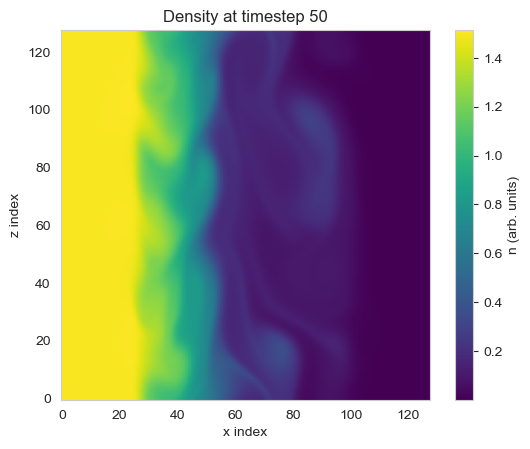

In [4]:
dens_array = np.array(dens_data)
# valid_images = dens_array[23:,:,:]
dim = 128
scale_factors = (dim/dens_data.shape[1], dim/dens_data.shape[2])
image = zoom(dens_array[2,:,:], scale_factors, order=3)  # order=1 is bilinear

print(np.shape(image))

plt.figure()
plt.imshow(image[:,:].T, origin='lower', cmap='viridis')
plt.colorbar(label="n (arb. units)")
plt.xlabel("x index")
plt.ylabel("z index")
plt.title("Density at timestep 50")
plt.grid(False)
plt.show()

(501, 128, 128)


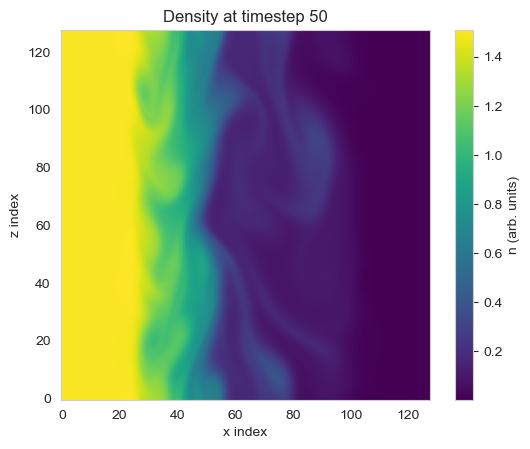

In [5]:
dens_array = np.array(dens_data)
valid_images = dens_array[:,:,:] # all images are good
dim = 128
scale_factors = (1, dim/dens_data.shape[1], dim/dens_data.shape[2])
images = zoom(valid_images, scale_factors, order=3)  # order=1 is bilinear

print(np.shape(images))

plt.figure()
plt.imshow(images[0,:,:].T, origin='lower', cmap='viridis')
plt.colorbar(label="n (arb. units)")
plt.xlabel("x index")
plt.ylabel("z index")
plt.title("Density at timestep 50")
plt.grid(False)
plt.show()


In [8]:
print(len(images))

501


In [10]:
# Do not do this

n = 128
im_list = []
for k in range(len(images)):
    im = images[k,:,:]
    im_slices = [im[:,0:n],im[:,n:2*n],im[:,2*n:3*n],im[:,3*n:4*n]]
    for i in range(4):
        im_new = np.hstack([im_slices[-i],im_slices[1-i],im_slices[2-i],im_slices[3-i]])
        im_list.append(im_new)

im_data = np.array(im_list)
print(np.shape(im_data))






(2004, 128, 128)


In [12]:


# np.save("data_numpy/density256.npy", im_data.astype(np.float32))
# np.save("data_numpy/density_large128.npy", images.astype(np.float32))
np.save("data_numpy/density_large_rolled128.npy", im_data.astype(np.float32))

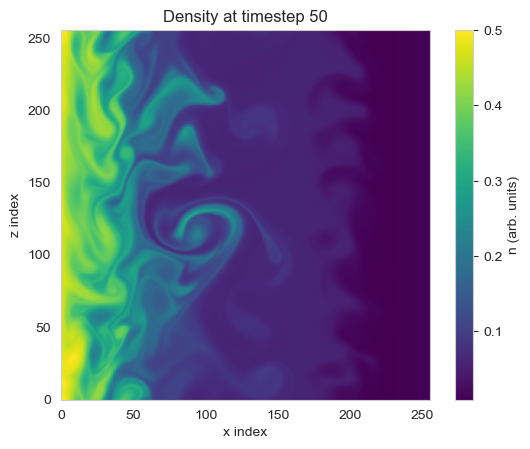

In [6]:
plt.figure()
plt.imshow(im_data[0,:,:].T, origin='lower', cmap='viridis')
plt.colorbar(label="n (arb. units)")
plt.xlabel("x index")
plt.ylabel("z index")
plt.title("Density at timestep 50")
plt.grid(False)
plt.show()
